In [5]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from project import getData, sigmoid, sigmoid_cost, error_rate, crossValidation, cost

In [7]:
class LogisticModel(object):
    def __init__(self):
        pass

    def fit(self, X, Y, learning_rate=10e-4, reg=0*10e-22, epochs=100000, show_fig=False):
        X, Y = shuffle(X, Y)
        
        N, D = X.shape
        Ntrain=int(N*0.8)
        
        Xvalid, Yvalid = X[Ntrain:], Y[Ntrain:]
        X, Y = X[:Ntrain], Y[:Ntrain]
        
        self.W = np.random.randn(D) / np.sqrt(D)
        self.b = 0

        costs = []
        accuracy = []
    
        best_validation_acc = 1
        
        for i in range(epochs):
            # forward propagation and cost calculation
            pY = self.forward(X) 

            # gradient descent step
            self.W -= learning_rate*(X.T.dot(pY - Y) + reg*self.W) # Why? 
            self.b -= learning_rate*((pY - Y).sum() + reg*self.b)
        
            if i % 1000 == 0:
                pYvalid = self.forward(Xvalid)
                c =sigmoid_cost(Yvalid, pYvalid) # Y=sigma c=cross-entropy
                costs.append(c)
                acc_val = 1-error_rate(Yvalid, np.round(pYvalid))
                accuracy.append(acc_val)
                print("i:", i, "cost:", c, "accuracy:", acc_val)
        
                if acc_val < best_validation_acc:
                    best_validation_error = acc_val
        print("best_validation_accuracy:", acc_val)
        
        if show_fig:
            plt.plot(costs)
            plt.title('model costs')
            plt.ylabel('cost')
            plt.xlabel('print times')
            plt.show()
            plt.plot(accuracy)
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('print times')
            plt.legend(['test'], loc='upper left')
            plt.show()  

    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)

    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction) #score = correct_rate = accuracy


Final DataSet:  (4546, 800)
i: 0 cost: 573.130815584 accuracy: 0.67032967033
i: 1000 cost: 546.209694982 accuracy: 0.698901098901
i: 2000 cost: 533.82535155 accuracy: 0.707692307692
i: 3000 cost: 524.15680523 accuracy: 0.714285714286


/Users/lijiachen/Desktop/GWU/Stat/ML2/Project/Project PyCodes/PyCode_FER/project.py:36: RuntimeWarning: divide by zero encountered in log
  return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()
/Users/lijiachen/Desktop/GWU/Stat/ML2/Project/Project PyCodes/PyCode_FER/project.py:36: RuntimeWarning: invalid value encountered in multiply
  return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()


i: 4000 cost: nan accuracy: 0.718681318681
i: 5000 cost: nan accuracy: 0.71978021978
i: 6000 cost: nan accuracy: 0.721978021978
i: 7000 cost: nan accuracy: 0.723076923077
i: 8000 cost: nan accuracy: 0.723076923077
i: 9000 cost: nan accuracy: 0.725274725275
i: 10000 cost: nan accuracy: 0.726373626374
i: 11000 cost: nan accuracy: 0.727472527473
i: 12000 cost: nan accuracy: 0.728571428571
i: 13000 cost: nan accuracy: 0.72967032967
i: 14000 cost: nan accuracy: 0.732967032967
i: 15000 cost: nan accuracy: 0.734065934066
i: 16000 cost: nan accuracy: 0.736263736264
i: 17000 cost: nan accuracy: 0.735164835165
i: 18000 cost: nan accuracy: 0.735164835165
i: 19000 cost: nan accuracy: 0.735164835165
i: 20000 cost: nan accuracy: 0.735164835165
i: 21000 cost: nan accuracy: 0.737362637363
i: 22000 cost: nan accuracy: 0.737362637363
i: 23000 cost: nan accuracy: 0.737362637363
i: 24000 cost: nan accuracy: 0.740659340659
i: 25000 cost: nan accuracy: 0.740659340659
i: 26000 cost: nan accuracy: 0.740659340

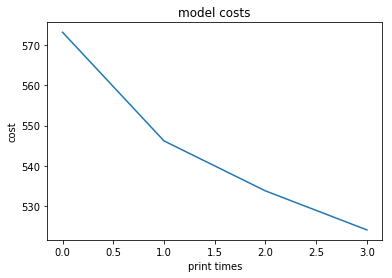

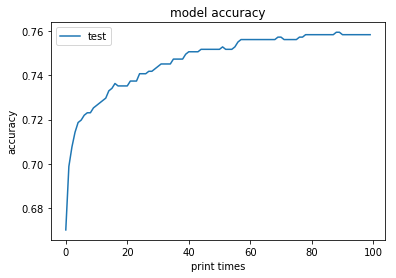

i: 0 cost: 456.594562744 accuracy: 0.684065934066
i: 1000 cost: 447.50598822 accuracy: 0.701923076923
i: 2000 cost: 449.861794873 accuracy: 0.711538461538
i: 3000 cost: 452.66609987 accuracy: 0.718406593407
i: 4000 cost: inf accuracy: 0.722527472527
i: 5000 cost: inf accuracy: 0.725274725275
i: 6000 cost: inf accuracy: 0.729395604396
i: 7000 cost: inf accuracy: 0.730769230769
i: 8000 cost: inf accuracy: 0.737637362637
i: 9000 cost: inf accuracy: 0.740384615385
i: 10000 cost: inf accuracy: 0.741758241758
i: 11000 cost: inf accuracy: 0.741758241758
i: 12000 cost: inf accuracy: 0.741758241758
i: 13000 cost: inf accuracy: 0.741758241758
i: 14000 cost: inf accuracy: 0.743131868132
i: 15000 cost: inf accuracy: 0.744505494505
i: 16000 cost: inf accuracy: 0.747252747253
i: 17000 cost: inf accuracy: 0.747252747253
i: 18000 cost: inf accuracy: 0.75
i: 19000 cost: nan accuracy: 0.752747252747
i: 20000 cost: nan accuracy: 0.752747252747
i: 21000 cost: nan accuracy: 0.752747252747
i: 22000 cost: na

KeyboardInterrupt: 

In [8]:
def main():
    X, Y = getData()

    X0 = X[Y==0, :]
    X1 = X[Y==1, :]
    X = np.vstack([X0, X1])
    Y = np.array([0]*len(X0) + [1]*len(X1))
    print ("Final DataSet: ", X.shape)
        
    model = LogisticModel()
    model.fit(X, Y, show_fig=True)
    model.score(X, Y)
    scores = crossValidation(model, X, Y, K=5)
    print ("Cross_Validation Accuracy -- mean:", np.mean(scores), "stdev:", np.std(scores))
    
if __name__ == '__main__':
    main()